In [19]:
from mountain import Mountain_one, Mountain_two

import numpy as np
from typing import Tuple
import os
import matplotlib.pyplot as plt 

In [53]:
def policy_evaluation(env, policy, theta=1e-6, gamma=1.0, order="left-right", max_iters=150):
    """
    Evaluates a policy with different state ordering, ensuring at least 'min_iters' iterations.
    
    Args:
        env -- Mountain environment
        policy -- Dictionary mapping states to actions
        theta -- Convergence threshold
        gamma -- Discount factor
        order -- "left-right" or "right-left"
        max_iters -- Maximum iterations for evaluation    
    Returns:
        V -- Dictionary of state values
        V_matrix -- Matrix representation of state values
    """
    V = { (i, j): 0 for i in range(31) for j in range(100) }
    states = sorted(V.keys(), key=lambda x: x[1]) if order == "left-right" else sorted(V.keys(), key=lambda x: -x[1])
    
    for iteration in range(max_iters):
        delta = 0
        for state in states:
            action = policy[state]
            next_state, reward = env.next_state(state, action), env.get_reward(state, action)
            new_value = reward + gamma * V[next_state]
            delta = max(delta, abs(new_value - V[state]))
            V[state] = new_value
        
        # Force at least 'min_iters' iterations before checking convergence
        if delta < theta:
            print(f"Converged at iteration {iteration}, Order: {order}")
            break

        print(f"Iteration {iteration}, Order: {order}, Value at (15,0): {V[(15,0)]}")

    # Convert V to matrix representation
    V_matrix = np.zeros((31, 100))
    for (i, j), value in V.items():
        V_matrix[i, j] = value

    return V, V_matrix


In [54]:
def straight_forward_policy(state):
    return "forward"

In [ ]:
env = Mountain_one()
policy = { (i, j): straight_forward_policy((i, j)) for i in range(31) for j in range(100) }
V_pi_str,V_pi_str_matrix = policy_evaluation(env, policy)

print("Value function for π_str computed.")

Iteration 0, Order: left-right, Value at (15,0): -0.31764707
Iteration 10, Order: left-right, Value at (15,0): -7.329411799999999
Iteration 20, Order: left-right, Value at (15,0): -14.686274619999999
Iteration 30, Order: left-right, Value at (15,0): -22.894118249999995
Iteration 40, Order: left-right, Value at (15,0): -30.65882427
Iteration 50, Order: left-right, Value at (15,0): -36.14117742
Iteration 60, Order: left-right, Value at (15,0): -39.3019618
Iteration 70, Order: left-right, Value at (15,0): -41.17647166999999
Iteration 80, Order: left-right, Value at (15,0): -49.73333446
Iteration 90, Order: left-right, Value at (15,0): -53.356864
Converged at iteration 98, Order: left-right


ValueError: too many values to unpack (expected 2)

In [56]:
# Compare values
V_left_right,_ = policy_evaluation(env, policy, order="left-right")
print(f"Final Value at (15,0) - Left-to-Right: {V_left_right[(15,0)]}")

Iteration 0, Order: left-right, Value at (15,0): -0.31764707
Iteration 10, Order: left-right, Value at (15,0): -7.329411799999999
Iteration 20, Order: left-right, Value at (15,0): -14.686274619999999
Iteration 30, Order: left-right, Value at (15,0): -22.894118249999995
Iteration 40, Order: left-right, Value at (15,0): -30.65882427
Iteration 50, Order: left-right, Value at (15,0): -36.14117742
Iteration 60, Order: left-right, Value at (15,0): -39.3019618
Iteration 70, Order: left-right, Value at (15,0): -41.17647166999999
Iteration 80, Order: left-right, Value at (15,0): -49.73333446
Iteration 90, Order: left-right, Value at (15,0): -53.356864
Converged at iteration 98, Order: left-right


ValueError: too many values to unpack (expected 2)

In [ ]:

V_right_left,_ = policy_evaluation(env, policy, order="right-left")
print(f"Final Value at (15,0) - Right-to-Left: {V_right_left[(15,0)]}")

Iteration 0, Order: right-left, Value at (15,0): -57.80784459
Converged at iteration 10, Order: right-left
Final Value at (15,0) - Right-to-Left: -57.80784459


## Consider the two polices evaluation in run with the different ordering of states. Did you learn something different between them?
The two value functions are the same, but the order in which the states are evaluated does affect the number of iterations required to converge. For the left to right, the policy converged after 98 iterations, while from right only required 10 iterations


In [27]:
def policy_iteration(env, gamma=1.0):
    """
    Runs the policy iteration algorithm to find an optimal policy.
    """
    policy = { (i, j): "forward" for i in range(31) for j in range(100) }  # Initialize random policy
    V = { (i, j): 0 for i in range(31) for j in range(100) }

    while True:
        # Policy Evaluation
        V,_ = policy_evaluation(env, policy, gamma=gamma)
        
        # Policy Improvement
        policy_stable = True
        for state in V:
            best_action = None
            best_value = float('-inf')

            for action in env.actions:
                next_state, reward = env.next_state(state, action), env.get_reward(state, action)
                value = reward + gamma * V[next_state]

                if value > best_value:
                    best_value = value
                    best_action = action

            if best_action != policy[state]:  # If policy changes, keep iterating
                policy_stable = False
                policy[state] = best_action
        
        if policy_stable:
            break

    return policy, V

In [28]:
env = Mountain_one()
optimal_policy, V_opt = policy_iteration(env)

print("Optimal policy computed using policy iteration.")


Iteration 0, Order: left-right, Value at (15,0): -0.31764707
Iteration 10, Order: left-right, Value at (15,0): -7.329411799999999
Iteration 20, Order: left-right, Value at (15,0): -14.686274619999999
Iteration 30, Order: left-right, Value at (15,0): -22.894118249999995
Iteration 40, Order: left-right, Value at (15,0): -30.65882427
Iteration 50, Order: left-right, Value at (15,0): -36.14117742
Iteration 60, Order: left-right, Value at (15,0): -39.3019618
Iteration 70, Order: left-right, Value at (15,0): -41.17647166999999
Iteration 80, Order: left-right, Value at (15,0): -49.73333446
Iteration 90, Order: left-right, Value at (15,0): -53.356864
Converged at iteration 98, Order: left-right
Iteration 0, Order: left-right, Value at (15,0): -0.3137255
Iteration 10, Order: left-right, Value at (15,0): -5.254902060000001
Iteration 20, Order: left-right, Value at (15,0): -13.40000023
Iteration 30, Order: left-right, Value at (15,0): -15.752941504999999
Iteration 40, Order: left-right, Value at 

In [29]:
def value_iteration(env, theta=1e-6, gamma=1.0):
    """
    Computes the optimal policy using Value Iteration.
    """
    V = { (i, j): 0 for i in range(31) for j in range(100) }

    while True:
        delta = 0
        for state in V:
            best_value = float('-inf')

            for action in env.actions:
                next_state, reward = env.next_state(state, action), env.get_reward(state, action)
                value = reward + gamma * V[next_state]

                best_value = max(best_value, value)

            delta = max(delta, abs(best_value - V[state]))
            V[state] = best_value
        
        if delta < theta:
            break  # Convergence check

    # Extract optimal policy
    optimal_policy = {}
    for state in V:
        best_action = max(env.actions, key=lambda a: env.get_reward(state, a) + gamma * V[env.next_state(state, a)])
        optimal_policy[state] = best_action

    return optimal_policy, V

In [30]:
env = Mountain_one()
optimal_policy_vi, V_vi = value_iteration(env)

print("Optimal policy computed using value iteration.")

Optimal policy computed using value iteration.


In [31]:
def plot_trajectory(env, policy, start_state):
    state = start_state
    trajectory = [state]
    while state[1] < 99:
        action = policy[state]
        state = env.next_state(state, action)
        trajectory.append(state)
    x_vals, y_vals = zip(*trajectory)
    
    # Plot terrain
    plt.figure(figsize=(10, 5))
    plt.imshow(env.get_map(), cmap='terrain', origin='upper')
    plt.colorbar(label='Roughness')
    
    # Plot trajectory on top
    plt.plot(y_vals, x_vals, marker='o', linestyle='-', color='red', label='Trajectory')
    plt.xlabel("Column (x)")
    plt.ylabel("Row (y)")
    plt.title("Robot Trajectory on Terrain")
    plt.legend()
    plt.show()


starting from (15,0)


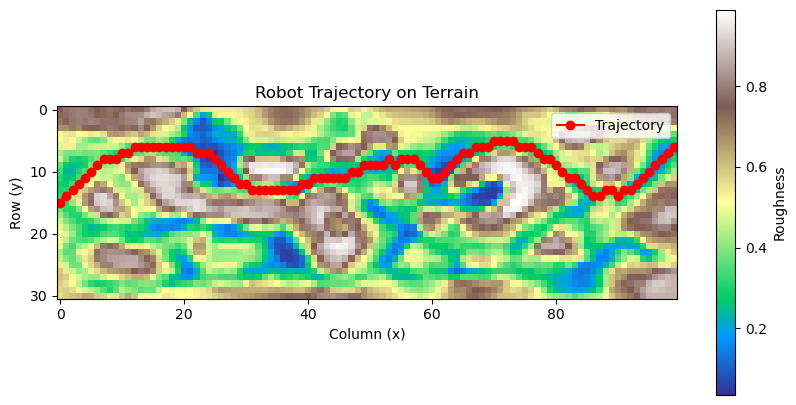

starting from (3,0)


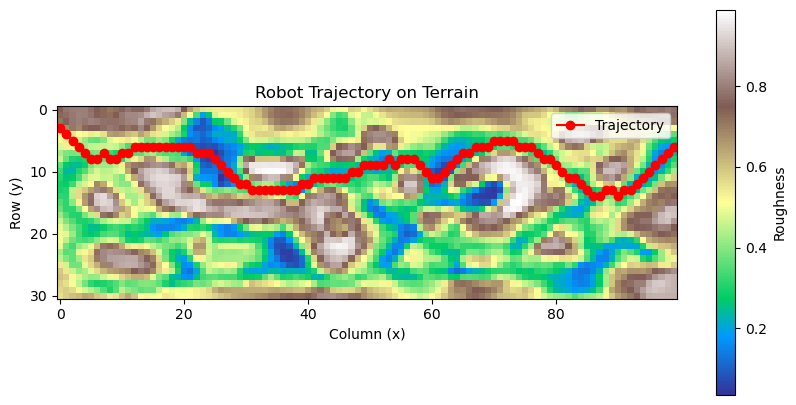

In [32]:
env = Mountain_one()
print("starting from (15,0)")
plot_trajectory(env, optimal_policy, (15, 0))  # Start from (15,0)
print("starting from (3,0)")
plot_trajectory(env, optimal_policy, (3, 0))   # Start from (3,0)

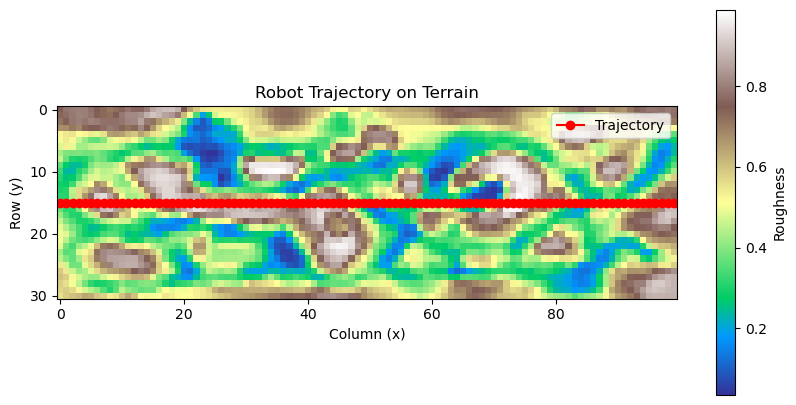

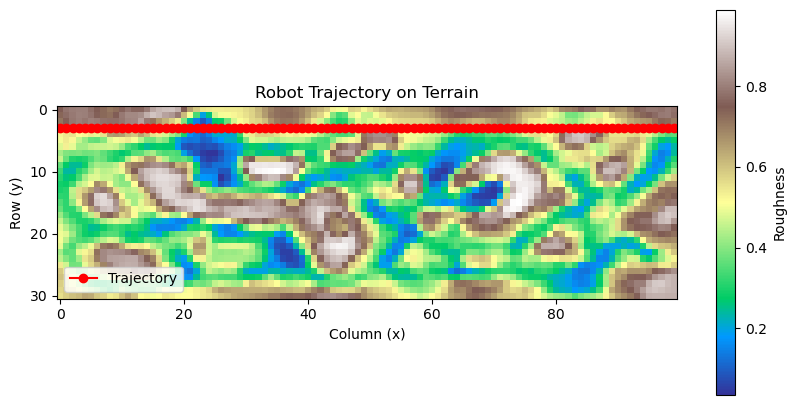

In [33]:
env = Mountain_one()
policy = { (i, j): straight_forward_policy((i, j)) for i in range(31) for j in range(100) }

plot_trajectory(env, policy, (15, 0))  # Start from (15,0)
plot_trajectory(env, policy, (3, 0))   # Start from (3,0)


# best start row

In [38]:
#iterate the different rows, 

def find_best_row(env,policy):

    num_rows = np.shape(env.get_map())[0]
    best_row = None
    best_value = float('-inf')
    val,_ = policy_evaluation(env, policy, order="left-right")
    for row in range(num_rows):
        v =  val[(row,0)] 
        if v > best_value:
            best_value = v
            best_row = row
    return best_row, best_value

env = Mountain_one()


Iteration 0, Order: left-right, Value at (15,0): -0.31764707
Iteration 10, Order: left-right, Value at (15,0): -7.329411799999999
Iteration 20, Order: left-right, Value at (15,0): -14.686274619999999
Iteration 30, Order: left-right, Value at (15,0): -22.894118249999995
Iteration 40, Order: left-right, Value at (15,0): -30.65882427
Iteration 50, Order: left-right, Value at (15,0): -36.14117742
Iteration 60, Order: left-right, Value at (15,0): -39.3019618
Iteration 70, Order: left-right, Value at (15,0): -41.17647166999999
Iteration 80, Order: left-right, Value at (15,0): -49.73333446
Iteration 90, Order: left-right, Value at (15,0): -53.356864
Converged at iteration 98, Order: left-right


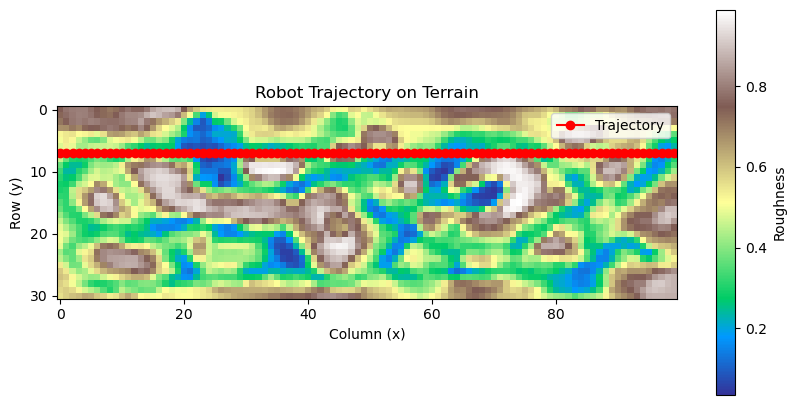

In [42]:
policy = { (i, j): straight_forward_policy((i, j)) for i in range(31) for j in range(100) }
env = Mountain_one()

row, val = find_best_row(env, policy)
plot_trajectory(env, policy, (row, 0))  # Start from best row

In [45]:
print(f"Best row: {row}, Value: {val}")

Best row: 7, Value: -35.72156986299999


Iteration 0, Order: left-right, Value at (15,0): -0.31764707
Iteration 10, Order: left-right, Value at (15,0): -5.890196339999998
Iteration 20, Order: left-right, Value at (15,0): -14.121569099999997
Iteration 30, Order: left-right, Value at (15,0): -17.403922180000002
Iteration 40, Order: left-right, Value at (15,0): -24.988236150000006
Iteration 50, Order: left-right, Value at (15,0): -27.909804910000005
Iteration 60, Order: left-right, Value at (15,0): -31.670589460000002
Iteration 70, Order: left-right, Value at (15,0): -33.141177774
Iteration 80, Order: left-right, Value at (15,0): -40.15686422399999
Iteration 90, Order: left-right, Value at (15,0): -43.756864373999996
Converged at iteration 98, Order: left-right


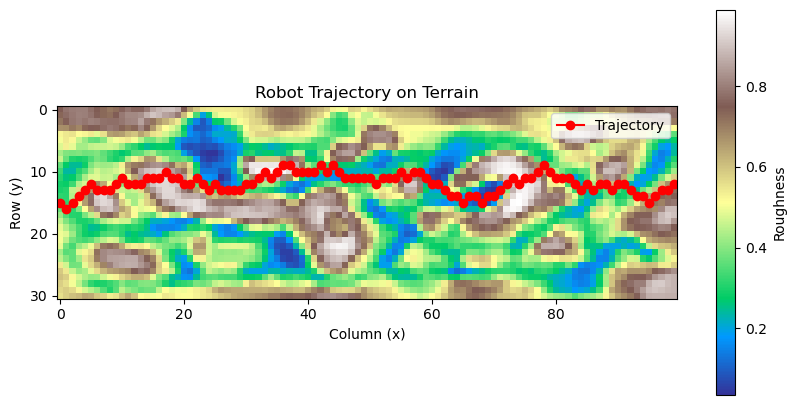

In [50]:
#Random policy
policy = { (i, j): np.random.choice(env.actions) for i in range(31) for j in range(100) }
env = Mountain_one()
#Check the policy evaluation
v_pi_rnd, _ = policy_evaluation(env, policy, order="left-right")
#plot the trajectory
plot_trajectory(env, policy, (15, 0))  # Start from (15,0)

In [52]:
#v_pi_rnd (15,0) V_pi_str (15,0) ,(3,0)
print(f"Value at (15,0) - Random Policy: {v_pi_rnd[(15,0)]}")
print(f"Value at (15,0) - Straight-Forward Policy: {V_pi_str[(15,0)]}")
print(f"Value at (3,0) - Straight-Forward Policy: {V_pi_str[(3,0)]}")

Value at (15,0) - Random Policy: -47.74117821400001
Value at (15,0) - Straight-Forward Policy: -57.80784459
Value at (3,0) - Straight-Forward Policy: -52.796080069999995
